In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, utils

%matplotlib inline

In [2]:
# Parameters

IMG_SIZE = 224
BATCH_SIZE = 32
IMG_SHOW_NUM = 6

In [3]:
# Data Augmentation: resize, normalize (ImageNet mean and std)

transformer = transforms.Compose([
    transforms.Resize(size = (IMG_SIZE, IMG_SIZE), antialias = True),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
])

testTransformer = transforms.Compose([
    transforms.Resize(size = (IMG_SIZE, IMG_SIZE), antialias = True),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),
])

In [4]:
# Dataset from: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign

trainPath = "./train"
testPath = "./test"

trainData = datasets.ImageFolder(root = trainPath, transform = transformer)
testData = datasets.ImageFolder(root = testPath, transform = testTransformer)

In [5]:
trainLoader = DataLoader(trainData, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4)
testLoader = DataLoader(testData, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)

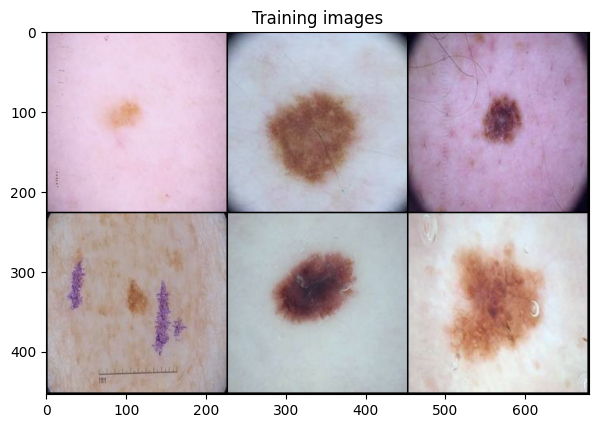

In [6]:
# Show images

def show_images(imgs, title):
    grid = utils.make_grid(imgs, nrow = 3, padding = 2, normalize=True)
    plt.figure(figsize = (7, 10))
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title(title)

dataiter = iter(trainLoader)
images, labels = next(dataiter)
show_images(images[:IMG_SHOW_NUM], title = "Training images")


In [7]:
# Train data statistics: number of samples, number of classes, classes, shape of the data

print("Train data statistics")
print("Number of samples: ", len(trainData))
print("Number of classes: ", len(trainData.classes))
print("Classes: ", trainData.classes)
print("Shape of the data: ", trainData[0][0].shape)

Train data statistics
Number of samples:  11879
Number of classes:  2
Classes:  ['Benign', 'Malignant']
Shape of the data:  torch.Size([3, 224, 224])


In [8]:
# Test data statistics: number of samples, number of classes, classes, shape of the data

print("Test data statistics")
print("Number of samples: ", len(testData))
print("Number of classes: ", len(testData.classes))
print("Classes: ", testData.classes)
print("Shape of the data: ", testData[0][0].shape)

Test data statistics
Number of samples:  2000
Number of classes:  2
Classes:  ['Benign', 'Malignant']
Shape of the data:  torch.Size([3, 224, 224])


In [9]:
# Number of samples per class in train data

class_dict = dict.fromkeys(testData.class_to_idx, 0)
              
for i in range(len(trainData)):
    class_dict[trainData.classes[trainData[i][1]]] += 1

print(class_dict)

{'Benign': 6289, 'Malignant': 5590}


In [10]:
# Mean and std of the train data

mean = 0
std = 0
for images, _ in trainLoader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= len(trainLoader.dataset)
std /= len(trainLoader.dataset)

print("Mean: ", mean)
print("Std: ", std)

Mean:  tensor([1.0394, 0.4445, 0.5912])
Std:  tensor([0.5279, 0.5983, 0.6442])


In [11]:
# Split train data into train and validation data

trainData, valData = random_split(trainData, [int(0.8*len(trainData)), len(trainData) - int(0.8*len(trainData))])
valLoader = DataLoader(valData, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4)

print("Number of samples in train data: ", len(trainData))
print("Number of samples in validation data: ", len(valData))

Number of samples in train data:  9503
Number of samples in validation data:  2376
